In [1]:
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
import time
from IPython.display import clear_output

In [2]:
env = gym.make('Taxi-v3')

In [3]:
class Q_LearningAgent:
    def __init__(self, env, epsilon=0.1, gamma=0.9, learning_rate=0.1):
        self.epsilon = epsilon
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.action_n = env.action_space.n
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
    
    
    def execute_epsilon_greedy_policy(self, state):
        if np.random.uniform() > self.epsilon:
            action = np.argmax(self.q_table[state])
        else:
            action = np.random.randint(self.action_n)
        return action
    
    
    def learn(self,state, action, reward, next_state, done):
        td_target = reward + self.gamma * np.max(self.q_table[next_state]) * (1.0 - done)
        td_error = td_target - self.q_table[state][action]
        self.q_table[state, action] += self.learning_rate * td_error

In [4]:
def execute_Q_learning_one_episode(env, agent, render=False):
    total_rewards, total_steps = 0.0, 0.0
    state = env.reset()
    while True:
        if render:
            env.render()
            clear_output(wait=True)
            time.sleep(0.02)
        action = agent.execute_epsilon_greedy_policy(state) # continually update (s, a) tuple!
        next_state, reward, done, _ = env.step(action)
        total_rewards += reward
        total_steps += 1.0
        agent.learn(state, action, reward, next_state, done)
        if done:
            if render:
                print('END')
                print('total_steps: ', total_steps)
            break
        else:
            state = next_state
    return total_rewards, total_steps

In [14]:
episodes = 5000
agent = Q_LearningAgent(env)
results = [execute_Q_learning_one_episode(env, agent) for _ in range(episodes)]

In [15]:
unzipped_results = list(zip(*results))
steps = unzipped_results[1]
rewards = unzipped_results[0]

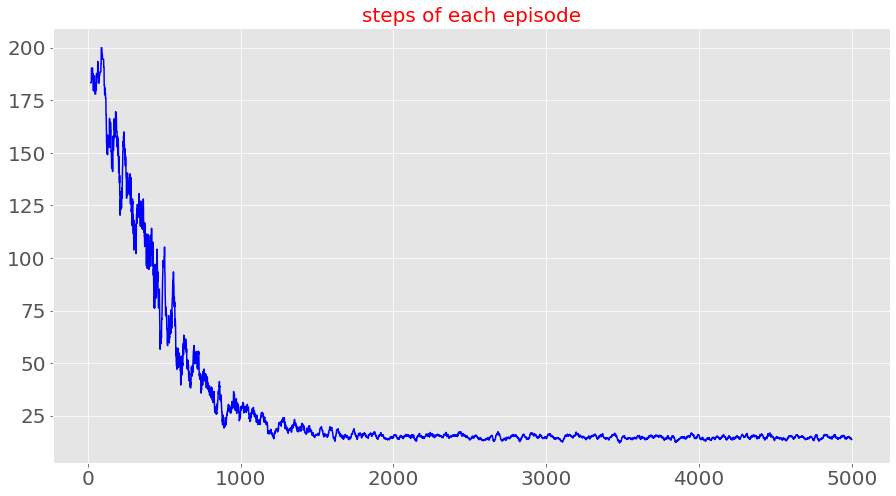

In [21]:
smoothed_steps = pd.Series(steps).rolling(20, 20).mean()
plt.figure(figsize=(15, 8))
plt.title("steps of each episode", fontsize=20, color='r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(smoothed_steps, color='b')
plt.savefig('QL_steps.png')

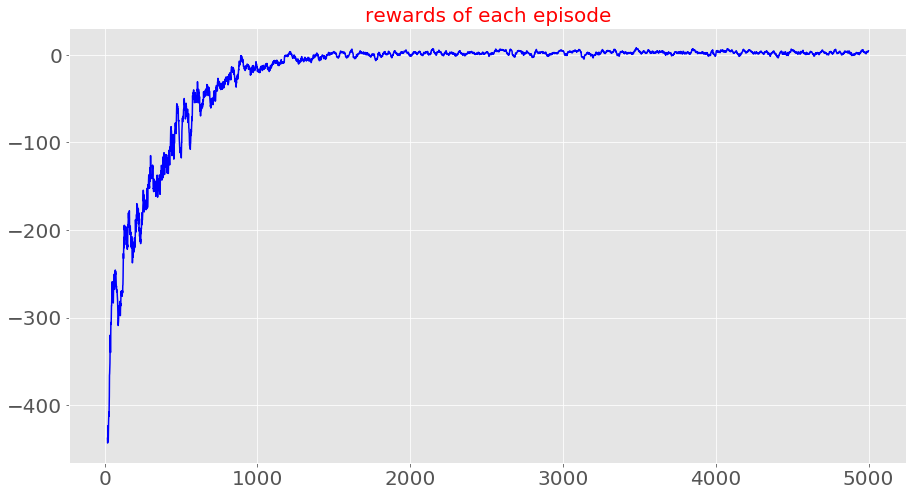

In [19]:
smoothed_rewards = pd.Series(rewards).rolling(20, 20).mean()
plt.figure(figsize=(15, 8))
plt.title("rewards of each episode", fontsize=20, color='r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(smoothed_rewards, color='b')
plt.savefig('QL_rewards.png')

In [9]:
# test policy
agent.epsilon = 0.0
test_results = [execute_Q_learning_one_episode(env, agent) for _ in range(1000)]
test_unzipped_results = list(zip(*test_results))
steps = test_unzipped_results[1]
rewards = test_unzipped_results[0]
print('average steps per episode: ', sum(steps) / len(steps))

average steps per episode:  12.981
